<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Análisis de Componentes Principales: PCA</h1>
  <h3 class="alert-heading">Prof. Enrique Mejía Ospino, emejia@uis.edu.co</h3>
  <h4 class="alert-heading">Escuela de Química</h4>
  <h5 class="alert-heading">Universidad Industrial de Santander</h5>
  <p>
  </div>

<font color=red size=4>**Utilizaremos el Modulo *sklearn* que es muy utilizado en modelamiento y machine learning**

In [1]:
#Cargamos las librerias que vamos a requeririr para hacer el desarrollo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn import preprocessing
from pybaselines import Baseline, utils
from sklearn.preprocessing import normalize

**<font size=4 color=green>El análisis de componentes principales (PCA) es una transformación lineal que reduce la dimensionalidad y busca la dirección en los datos con la mayor varianza. Debido a la naturaleza del método, es sensible a variables con diferentes rangos de valores y, por lo tanto, también a valores atípicos. Una ventaja es que permite visualizar los datos en un diagrama de dispersión bidimensional o tridimensional, lo que facilita la confirmación visual de los valores atípicos detectados. Además, proporciona una buena interpretabilidad de las variables de respuesta. Otra gran ventaja del PCA es que se puede combinar con otros métodos, como diferentes métricas de distancia, para mejorar la precisión de la detección de valores atípicos.**

In [2]:
data = pd.read_csv('./Datos/raw_data.csv')
data

,labels,670,671,672,673,674,675,676,677,678,...,1791,1792,1793,1794,1795,1796,1797,1798,1799,1800
0,Hec,2013.9,2013.0,2012.0,2012.4,2013.3,2014.2,2014.0,2012.6,2011.2,...,1815.2,1815.5,1815.2,1815.2,1816.4,1817.6,1817.8,1817.5,1817.3,1817.3
1,Hec,1955.2,1955.1,1955.0,1954.3,1953.4,1952.5,1951.7,1951.0,1950.3,...,1806.2,1808.0,1809.5,1810.9,1811.9,1812.9,1812.8,1812.0,1810.9,1808.0
2,Hec,1924.2,1922.8,1921.4,1920.6,1920.1,1919.6,1919.4,1919.6,1919.8,...,1805.9,1805.0,1804.1,1803.3,1803.0,1802.8,1802.5,1802.2,1801.9,1801.0
3,Hec,1946.3,1945.4,1944.5,1944.6,1945.1,1945.5,1944.9,1943.4,1941.9,...,1813.3,1812.7,1811.9,1811.0,1809.4,1807.8,1807.6,1808.0,1808.0,1806.4
4,Hec,1909.0,1909.0,1909.0,1909.2,1909.4,1909.6,1908.8,1907.1,1905.4,...,1797.1,1796.9,1796.4,1795.8,1794.9,1794.0,1794.0,1794.4,1794.8,1795.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9462,NaN,1849.7,1850.9,1852.2,1853.2,1854.2,1855.3,1854.3,1853.2,1852.1,...,1706.1,1707.1,1708.0,1708.1,1707.9,1707.9,1709.5,1711.1,1710.9,1709.5
9463,NaN,1845.1,1845.7,1846.3,1846.1,1845.9,1845.7,1844.8,1843.9,1843.0,...,1704.7,1704.5,1704.4,1705.2,1706.5,1707.7,1707.5,1707.4,1707.5,1707.9
9464,NaN,1912.2,1913.0,1914.0,1915.8,1917.7,1919.6,1919.4,1919.1,1918.8,...,1705.1,1705.9,1706.7,1706.9,1706.8,1706.8,1707.6,1708.4,1708.7,1708.7
9465,NaN,1821.9,1821.8,1821.7,1822.2,1822.6,1823.0,1822.2,1821.3,1820.4,...,1702.8,1703.4,1704.0,1704.2,1704.1,1704.0,1703.5,1702.9,1702.2,1701.2


In [3]:
data1 = data.dropna() # Eliminamos las filas sin datos
wavenumbers = data1.columns[1:].astype(np.float64) # Extraemos las longitudes de onda de las columnas
data1

,labels,670,671,672,673,674,675,676,677,678,...,1791,1792,1793,1794,1795,1796,1797,1798,1799,1800
0,Hec,2013.9,2013.0,2012.0,2012.4,2013.3,2014.2,2014.0,2012.6,2011.2,...,1815.2,1815.5,1815.2,1815.2,1816.4,1817.6,1817.8,1817.5,1817.3,1817.3
1,Hec,1955.2,1955.1,1955.0,1954.3,1953.4,1952.5,1951.7,1951.0,1950.3,...,1806.2,1808.0,1809.5,1810.9,1811.9,1812.9,1812.8,1812.0,1810.9,1808.0
2,Hec,1924.2,1922.8,1921.4,1920.6,1920.1,1919.6,1919.4,1919.6,1919.8,...,1805.9,1805.0,1804.1,1803.3,1803.0,1802.8,1802.5,1802.2,1801.9,1801.0
3,Hec,1946.3,1945.4,1944.5,1944.6,1945.1,1945.5,1944.9,1943.4,1941.9,...,1813.3,1812.7,1811.9,1811.0,1809.4,1807.8,1807.6,1808.0,1808.0,1806.4
4,Hec,1909.0,1909.0,1909.0,1909.2,1909.4,1909.6,1908.8,1907.1,1905.4,...,1797.1,1796.9,1796.4,1795.8,1794.9,1794.0,1794.0,1794.4,1794.8,1795.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9422,Thp-1,1858.5,1859.7,1860.7,1860.5,1860.2,1860.0,1860.5,1861.0,1861.5,...,1714.8,1715.4,1716.0,1716.4,1716.6,1716.8,1717.8,1718.8,1719.1,1718.7
9423,Thp-1,1824.1,1825.2,1826.3,1825.8,1825.4,1825.0,1825.0,1825.0,1825.0,...,1699.4,1700.9,1702.4,1703.2,1703.4,1703.7,1704.0,1704.2,1703.7,1702.7
9424,Thp-1,1980.1,1979.7,1979.3,1979.3,1979.3,1979.3,1977.8,1976.2,1974.6,...,1724.0,1724.0,1724.0,1723.8,1723.6,1723.3,1723.3,1723.3,1723.6,1724.2
9425,Thp-1,1886.4,1887.1,1887.8,1888.5,1889.3,1890.0,1890.2,1890.4,1890.6,...,1711.2,1710.6,1709.9,1709.4,1709.0,1708.9,1710.3,1711.7,1712.4,1712.6


In [4]:
data1.iloc[:1, 1:]

,670,671,672,673,674,675,676,677,678,679,...,1791,1792,1793,1794,1795,1796,1797,1798,1799,1800
0,2013.9,2013.0,2012.0,2012.4,2013.3,2014.2,2014.0,2012.6,2011.2,2010.0,...,1815.2,1815.5,1815.2,1815.2,1816.4,1817.6,1817.8,1817.5,1817.3,1817.3


**<font size=4 color=green>Graficamos una fila.**

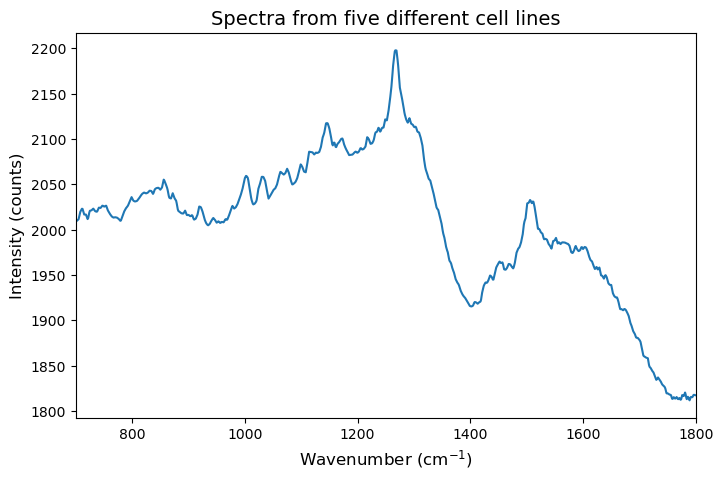

In [5]:
#data1.iloc[:1, 1:]
fig, ax = plt.subplots(figsize=(8,5))

# Plot the media spectra on the same axis
ax.plot(wavenumbers, data1.iloc[:1, 1:].T[0])


# Add axis labels and legend
ax.set_xlim(700, 1800)
ax.set_xlabel('Wavenumber (cm$^{-1}$)', fontsize=12)
ax.set_ylabel('Intensity (counts)', fontsize=12)
ax.set_title('Spectra from five different cell lines', fontsize=14)
plt.show()

**<font size=4 color=green>Linea base**

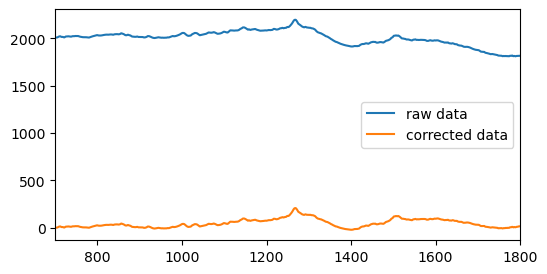

In [6]:
baseline_fitter = Baseline(x_data=wavenumbers)

bkg_21, params_21 = baseline_fitter.asls(data1.iloc[:1, 1:].T[0], lam=1e7, p=0.02)

#bkg_1, params_1 = baseline_fitter.modpoly(y1, poly_order=3)
#bkg_2, params_2 = baseline_fitter.asls(y1, lam=1e7, p=0.02)
#bkg_3, params_3 = baseline_fitter.mor(y1, half_window=30)
#bkg_4, params_4 = baseline_fitter.snip(y1, max_half_window=40, decreasing=True, smooth_half_window=3)

fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(wavenumbers, data1.iloc[:1, 1:].T[0], label='raw data', lw=1.5)
ax.plot(wavenumbers, data1.iloc[:1, 1:].T[0]-bkg_21, label='corrected data')
ax.set_xlim(700,1800)

plt.legend()
plt.show()

In [7]:
data_x = data1.iloc[:, 1:].T
#data_x = data_x.drop(['labels'], axis=0)
bkg = []
data_x_cor = []
for k in range(len(data_x.columns)):
    baseline_fitter = Baseline(x_data=wavenumbers)
    bkg_21, params_21 = baseline_fitter.asls(data_x[k], lam=1e7, p=0.02)
    data_cor = data_x[k].values-bkg_21
    data_cor_n = normalize(data_cor.reshape(1,-1), norm='l2')
    data_cor_n = data_cor_n.ravel()
    bkg.append(bkg_21)
    data_x_cor.append(data_cor_n)

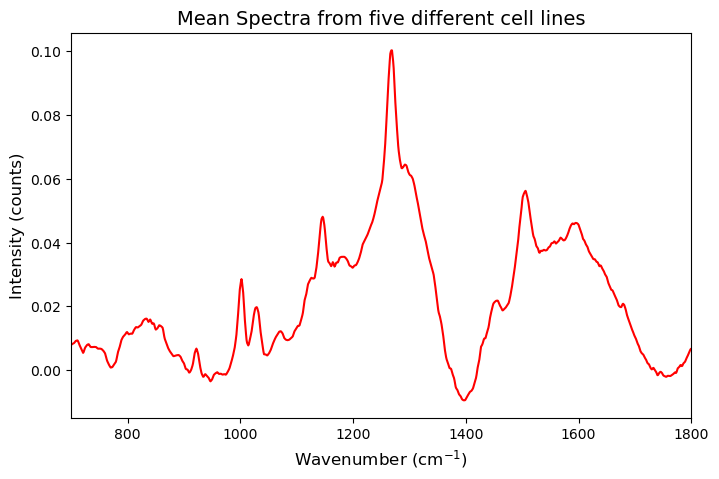

In [8]:
fig, ax = plt.subplots(figsize=(8,5))

# Plot the media spectra on the same axis
ax.plot(wavenumbers, pd.DataFrame(data_x_cor).T.mean(axis=1), color='red')

# Add axis labels and legend
ax.set_xlim(700, 1800)
ax.set_xlabel('Wavenumber (cm$^{-1}$)', fontsize=12)
ax.set_ylabel('Intensity (counts)', fontsize=12)
ax.set_title('Mean Spectra from five different cell lines', fontsize=14)
#ax.legend()

# Show the plot
plt.show()

In [9]:
pd.DataFrame(data_x_cor).T

,0,1,2,3,4,5,6,7,8,9,...,9417,9418,9419,9420,9421,9422,9423,9424,9425,9426
0,0.001918,0.007407,0.006833,0.005445,0.005057,0.008145,0.006053,0.005346,0.005061,0.005610,...,0.011989,0.010064,0.002648,0.007472,0.010439,0.007311,0.007936,0.009374,0.006852,0.008396
1,0.001493,0.007351,0.006007,0.004930,0.005055,0.008088,0.006051,0.004844,0.004655,0.005108,...,0.012144,0.009516,0.003249,0.007085,0.011357,0.008100,0.008752,0.009183,0.007280,0.008413
2,0.001020,0.007294,0.005181,0.004414,0.005053,0.008032,0.006049,0.004343,0.004248,0.004606,...,0.012192,0.009145,0.003806,0.006845,0.012238,0.008752,0.009568,0.008992,0.007708,0.008371
3,0.001205,0.006904,0.004709,0.004477,0.005166,0.008090,0.006398,0.004955,0.004481,0.004659,...,0.011598,0.009661,0.004075,0.007086,0.012858,0.008591,0.009164,0.008996,0.008135,0.008087
4,0.001623,0.006403,0.004414,0.004772,0.005278,0.008149,0.006806,0.006000,0.004887,0.004934,...,0.011039,0.010212,0.004345,0.007364,0.013515,0.008362,0.008836,0.009000,0.008627,0.007803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,0.006211,0.006967,0.004319,0.003901,0.004621,0.004287,0.005293,0.004652,0.002286,0.000580,...,0.003420,0.006536,0.006975,0.005251,0.006653,0.008028,0.005617,0.004894,0.001258,0.004276
1127,0.006513,0.007119,0.004341,0.003992,0.004809,0.004248,0.005903,0.005673,0.002413,0.001549,...,0.003841,0.006868,0.007476,0.005704,0.007166,0.008921,0.006060,0.005126,0.002374,0.004797
1128,0.006581,0.006882,0.004364,0.004431,0.005228,0.004267,0.006862,0.006941,0.002249,0.002851,...,0.004298,0.007201,0.007977,0.006194,0.007678,0.009815,0.006427,0.005357,0.003489,0.005378
1129,0.006695,0.006477,0.004386,0.004638,0.005647,0.004285,0.007530,0.008148,0.002086,0.004042,...,0.004969,0.007781,0.008522,0.006610,0.007706,0.010233,0.006261,0.005733,0.004156,0.005537


In [10]:
data1[['labels']]

,labels
0,Hec
1,Hec
2,Hec
3,Hec
4,Hec
...,...
9422,Thp-1
9423,Thp-1
9424,Thp-1
9425,Thp-1


In [11]:
# Iniciamos el desarrollo del PCA en este caso con 9 componentes
pca=PCA(n_components=9) # Otra opción es hacer pca hasta obtener un mínimo explicado ej.: pca=PCA(.85)
pca1=pca.fit(pd.DataFrame(data_x_cor)) # obtener los componentes principales
datos_pca=pca.transform(pd.DataFrame(data_x_cor)) # convertimos nuestros datos con las nuevas dimensiones de PCA, scores

In [12]:
# Esta celda es para observar la varianza explicada con 5 componentes, se podría variar a los que se quisiese
print("dimensión datos_pca", datos_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:9]))
#Vemos que con 9 componentes tenemos algo mas del 95% de varianza explicada
datos_pca1 = pd.DataFrame(datos_pca) # Convierte los datos pca en un DataFrame
datos_pca1=pd.concat([datos_pca1, data1[['labels']]] ,axis=1) # Se agrega la columna del tipo de muestra

dimensión datos_pca (9427, 9)
[0.4911338  0.24298944 0.06577942 0.03417407 0.0317049  0.01609968
 0.01189957 0.00777926 0.00636365]
suma: 0.9079237930040923


In [13]:
datos_pca1

,0,1,2,3,4,5,6,7,8,labels
0,-0.020744,-0.039572,-0.065452,0.019590,-0.003583,-0.024716,-0.013781,0.020628,0.018849,Hec
1,0.063156,-0.056609,-0.023208,0.046119,0.008719,-0.047554,-0.020516,0.006635,-0.014406,Hec
2,0.105317,-0.042856,-0.023034,0.055608,0.004345,-0.040404,-0.021612,0.010899,-0.003965,Hec
3,0.080049,-0.031473,-0.027244,0.054664,0.010829,-0.027020,-0.024535,-0.001009,-0.013646,Hec
4,0.103457,-0.038398,-0.015976,0.061962,0.007318,-0.054619,-0.013168,0.011969,-0.010178,Hec
...,...,...,...,...,...,...,...,...,...,...
9422,0.001249,0.104651,0.027272,-0.019681,-0.073154,-0.017315,-0.059879,-0.001962,-0.001569,Thp-1
9423,0.036371,0.113654,0.033729,-0.012334,-0.058553,-0.017492,-0.072375,0.003548,0.002431,Thp-1
9424,-0.138800,0.059995,0.035968,0.003077,-0.037391,0.015102,0.007995,0.014757,0.016016,Thp-1
9425,-0.041637,0.113580,0.042824,0.005546,-0.033837,-0.015732,-0.020431,-0.002083,0.004608,Thp-1


In [14]:
variancia_explicada = np.insert(expl, 0, 0)
variancia_acomulada = np.cumsum(np.round(variancia_explicada, decimals=3))
pc_df = pd.DataFrame([''] + [f"PC{i+1}" for i in range(datos_pca.shape[1])], columns =['PC'])
variancia_explicada_df = pd.DataFrame(variancia_explicada, columns=["Variancia Explicada"])
variancia_acomulada_df = pd.DataFrame(variancia_acomulada, columns=['Variancia Acomulada']
) ## making data frames for variances 
df_variancia_explicada = pd.concat([pc_df, variancia_explicada_df, variancia_acomulada_df], axis =1)
df_variancia_explicada  

,PC,Variancia Explicada,Variancia Acomulada
0,,0.000000,0.000
1,PC1,0.491134,0.491
2,PC2,0.242989,0.734
3,PC3,0.065779,0.800
4,PC4,0.034174,0.834
5,PC5,0.031705,0.866
6,PC6,0.016100,0.882
7,PC7,0.011900,0.894
8,PC8,0.007779,0.902
9,PC9,0.006364,0.908


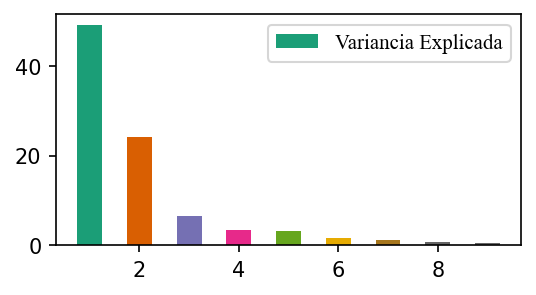

In [15]:
fig, ax = plt.subplots(figsize=(4, 2), dpi=150, gridspec_kw=None)
plt.rcParams["font.family"] = 'Times New Roman'
colors = plt.cm.Dark2(range(10)) # Dark2, Pastel1, Paired, Accent, Pastel2, Set1, Set2, Set3, tab10, tab20, tab10b, estas son diferentes paletas de colores
ve_pc=df_variancia_explicada.drop(0, axis=0)
x = ve_pc.index
altura = ve_pc['Variancia Explicada']
ax.bar(x=x, height=altura*100, width=0.5, color=colors, label='Variancia Explicada')
ax.legend(loc='best', fontsize=10);
plt.show()

**<font size=4 color=blue>Vamos a desarrollar un script para hacer Análisis de Componentes Principales (PCA) y para ello utilizaremos los datos de espectrometría de masas FTICRMS obtenidos de dos tipos de muestras, petróleo crudo y una fracción de crudo denominada fondos de vacío, los datos de espectrometría de masas han sido procesados y extraídas las formulas moleculares de los componentes de cada muestra en terminos de sus intensidades relativas. El número de muestras es de 40, 22 crudos y 18 fondos de vacío.**

In [2]:
data = pd.read_excel('https://github.com/emejiao/Mass_Spectra3/blob/master/Supplementary_CCR.xlsx?raw=true')#, sheet_name='Sheet1', header=0, index_col=0)
data = data.drop(['Molecules\Samples'], axis=1)

In [3]:
data

,CR1,CR2,CR3,CR4,CR5,CR6,CR7,CR8,CR9,CR10,...,VR10,VR11,VR12,VR13,VR14,VR15,VR16,VR17,VR18,VR19
0,16.122,28.754,11.208,24.784,2.360,2.252,2.612,2.020,17.854,15.985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30.101,35.596,18.767,36.845,10.718,7.076,10.005,11.003,35.712,28.735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38.500,54.152,30.508,55.708,25.710,16.029,22.088,28.136,50.344,41.754,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,31.574,43.425,27.087,41.362,43.697,36.075,39.573,46.366,35.953,30.995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52.324,62.510,40.397,57.982,37.720,24.171,25.059,41.800,63.023,40.590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59687,0.000,0.000,0.000,0.000,0.000,1.506,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59688,0.000,0.000,0.000,0.000,0.000,2.188,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59689,0.000,0.000,0.000,0.000,0.000,0.000,2.299,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59690,0.000,0.000,0.000,0.000,0.000,0.000,2.354,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<font size=4 color=green>**Ahora vamos a considerar solo los valores númericos y pondremos las variable predictoras en las columnas y las muestras en las filas.**

In [4]:
val=data.values
valt=val.T
valtn = preprocessing.normalize(valt, norm='l1')# Normaliza los datos

<font size=4 color=crimson>**Creamos etiquetas para reconocer los resultados.**

In [19]:
Y = pd.DataFrame(['CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR',
                  'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR',
                  'CR', 'CR', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR',
                  'VR', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR',
                  'VR', 'VR'])
Y1=Y.set_axis(['Muestra'], axis=1, inplace=False)

<font size=4 color=crimson>**Ahora Iniciamos el ajuste para obtener los CP utilizando la función PCA del modulo *sklearn* utilizando los datos normalizados.**

In [20]:
# Iniciamos el desarrollo del PCA en este caso con 9 componentes
pca=PCA(n_components=9) # Otra opción es hacer pca hasta obtener un mínimo explicado ej.: pca=PCA(.85)
pca1=pca.fit(valtn) # obtener los componentes principales
datos_pca=pca.transform(valtn) # convertimos nuestros datos con las nuevas dimensiones de PCA, scores

#out = pca.fit_transform(valtn) # otra opción

# Esta celda es para observar la varianza explicada con 5 componentes, se podría variar a los que se quisiese
print("dimensión datos_pca", datos_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:9]))
#Vemos que con 9 componentes tenemos algo mas del 95% de varianza explicada
datos_pca1 = pd.DataFrame(datos_pca) # Convierte los datos pca en un DataFrame
datos_pca1=pd.concat([datos_pca1, Y1] ,axis=1) # Se agrega la columna del tipo de muestra

dimensión datos_pca (40, 9)
[0.72166446 0.09206499 0.06920497 0.02493316 0.01663746 0.01623273
 0.00860407 0.00818903 0.0049023 ]
suma: 0.9624331720924074


In [21]:
scores_df = pd.DataFrame(datos_pca, columns = [f"PC{i+1}" for i in range(datos_pca.shape[1])])
scores_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.020986,0.003528,-0.004358,-0.000829,-0.002441,0.000147,0.000190,0.003038,-0.002069
1,0.018113,0.004578,0.000668,0.001180,-0.001818,-0.000987,-0.000927,0.001590,-0.002715
2,0.032063,-0.004886,-0.005630,-0.002879,-0.002735,0.008669,0.000674,-0.002956,-0.002893
3,0.022539,-0.003314,-0.004269,-0.000819,-0.001135,0.005069,-0.001003,-0.002386,-0.002113
4,0.010698,-0.012285,-0.002548,-0.002649,0.003557,-0.000898,0.003369,0.004300,0.003801
5,0.017093,0.008157,0.008474,0.006179,0.000610,-0.000159,0.002315,0.000722,-0.000106
6,0.017729,0.002398,0.008971,0.002512,0.001095,0.000946,0.003075,-0.000196,-0.000057
7,0.015131,-0.007273,-0.003994,-0.002819,0.001590,-0.001334,0.002295,0.003238,0.003463
8,0.018273,0.002823,-0.004483,-0.002417,-0.000610,-0.003978,-0.001656,0.000117,0.000781
9,0.016786,-0.010111,0.000831,-0.001593,0.005657,0.001485,-0.003778,-0.002610,0.001747


In [22]:
variancia_explicada = np.insert(expl, 0, 0)
variancia_acomulada = np.cumsum(np.round(variancia_explicada, decimals=3))
pc_df = pd.DataFrame([''] + [f"PC{i+1}" for i in range(datos_pca.shape[1])], columns =['PC'])
variancia_explicada_df = pd.DataFrame(variancia_explicada, columns=["Variancia Explicada"])
variancia_acomulada_df = pd.DataFrame(variancia_acomulada, columns=['Variancia Acomulada']
) ## making data frames for variances 
df_variancia_explicada = pd.concat([pc_df, variancia_explicada_df, variancia_acomulada_df], axis =1)
df_variancia_explicada  

,PC,Variancia Explicada,Variancia Acomulada
0,,0.000000,0.000
1,PC1,0.721664,0.722
2,PC2,0.092065,0.814
3,PC3,0.069205,0.883
4,PC4,0.024933,0.908
5,PC5,0.016637,0.925
6,PC6,0.016233,0.941
7,PC7,0.008604,0.950
8,PC8,0.008189,0.958
9,PC9,0.004902,0.963


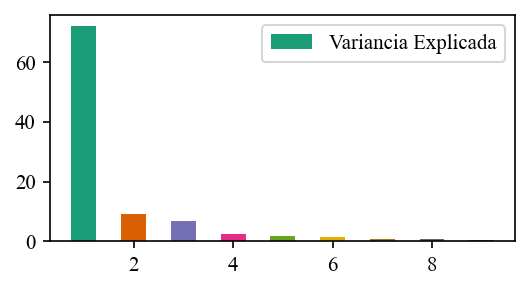

In [23]:
fig, ax = plt.subplots(figsize=(4, 2), dpi=150, gridspec_kw=None)
plt.rcParams["font.family"] = 'Times New Roman'
colors = plt.cm.Dark2(range(10)) # Dark2, Pastel1, Paired, Accent, Pastel2, Set1, Set2, Set3, tab10, tab20, tab10b, estas son diferentes paletas de colores
ve_pc=df_variancia_explicada.drop(0, axis=0)
x = ve_pc.index
altura = ve_pc['Variancia Explicada']
ax.bar(x=x, height=altura*100, width=0.5, color=colors, label='Variancia Explicada')
ax.legend(loc='best', fontsize=10);

In [24]:
from bokeh.io import output_notebook, show, output_file, export_png
from bokeh.plotting import figure, show
output_notebook()
colormap = {'CR': 'red', 'VR': 'green'}
colors = [colormap[x] for x in datos_pca1['Muestra']]
TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

# Draw a chart
p = figure(title='PCA', plot_width=600, plot_height=400,
           x_axis_label='PCA 1', y_axis_label='PCA 2', toolbar_location="above", tools=TOOLS)

p.circle(datos_pca1[0], datos_pca1[1], color=colors, line_width=2, legend_label='colormap', 
         size=10, alpha=0.6)
p.ygrid.band_fill_color = "olive"
p.ygrid.band_fill_alpha = 0.1
p.legend.location = "top_right"
p.grid.visible = True
p.title.align = "center"
p.title.text_font_size = "20px"
#p.legend.location = "top_center"

show(p)

Loading BokehJS ...

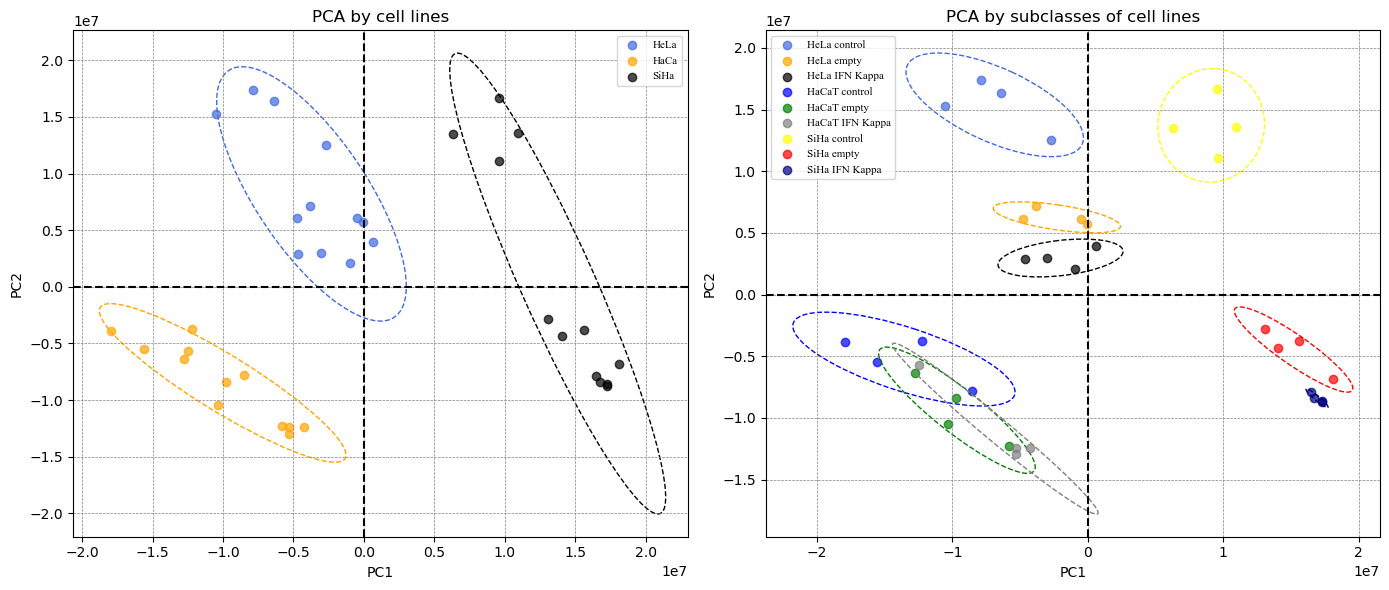

In [8]:
pca = PCA(n_components=2) # Definimos el Modelo
pcs = pca.fit_transform(X)
pcs_df = pd.DataFrame(data=pcs, columns=[f"PC{i+1}" for i in range(pcs.shape[1])])
pcs_df['label'] = y.ravel()

pcs_df['labelc'] = yc.ravel()
loadings = pca.components_.T
varianza_explicada = pca.explained_variance_ratio_

# Gráficas PCA
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
plt.rcParams["font.family"] = 'Times New Roman'
colors = ['royalblue', 'orange', 'black', 'blue', 'green', 'grey', 'yellow', 'red', 'navy', 'cian']
markers = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o']

# Función para dibujar las elipse de Hotelling
def draw_hotelling_ellipse(points, ax, n_std=2.0, **kwargs):
    cov = np.cov(points, rowvar=False)
    mean = np.mean(points, axis=0)
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    
    order = eigenvalues.argsort()[::-1]
    eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]

    theta = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
    width, height = 2 * n_std * np.sqrt(eigenvalues)

    ellipse = Ellipse(xy=mean, width=width, height=height, angle=theta, edgecolor=kwargs.get('edgecolor', 'black'),
                      facecolor='none', linestyle=kwargs.get('linestyle', '-'))
    ax.add_patch(ellipse)

for label1, label, color, marker in zip(Et[0].unique(), pcs_df['label'].unique(), colors, markers):
    points = pcs_df[pcs_df['label'] == label][['PC1', 'PC2']].values
    ax2.scatter(points[:, 0], points[:, 1], color=color, marker=marker, label=label1, alpha=0.7)
    draw_hotelling_ellipse(points, ax2, edgecolor=color, linestyle='--')
    
for label1, label, color, marker in zip(cel[0].unique(), pcs_df['labelc'].unique(), colors, markers):
    points = pcs_df[pcs_df['labelc'] == label][['PC1', 'PC2']].values
    ax1.scatter(points[:, 0], points[:, 1], color=color, marker=marker, label=label1, alpha=0.7)
    draw_hotelling_ellipse(points, ax1, edgecolor=color, linestyle='--')

ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.legend(fontsize=8)
ax2.set_title("PCA by subclasses of cell lines")
ax2.axvline(x = 0, color = 'k', linestyle='--', label='Average')
ax2.axhline(y = 0, color = 'k', linestyle='--', label='Average')
ax2.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.legend(fontsize=8)
ax1.set_title("PCA by cell lines")
ax1.axvline(x = 0, color = 'k', linestyle='--', label='Average')
ax1.axhline(y = 0, color = 'k', linestyle='--', label='Average')
ax1.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.tight_layout()
plt.savefig('PCA2.png', dpi=600, bbox_inches='tight')
plt.show()

In [24]:
from bokeh.io import output_notebook, show, output_file, export_png
from bokeh.plotting import figure, show
output_notebook()
colormap = {'CR': 'red', 'VR': 'green'}
colors = [colormap[x] for x in datos_pca1['Muestra']]
TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

# Draw a chart
p = figure(title='PCA', plot_width=600, plot_height=400,
           x_axis_label='PCA 1', y_axis_label='PCA 2', toolbar_location="above", tools=TOOLS)

p.circle(datos_pca1[0], datos_pca1[1], color=colors, line_width=2, legend_label='colormap', 
         size=10, alpha=0.6)
p.ygrid.band_fill_color = "olive"
p.ygrid.band_fill_alpha = 0.1
p.legend.location = "top_right"
p.grid.visible = True
p.title.align = "center"
p.title.text_font_size = "20px"
#p.legend.location = "top_center"

show(p)

Loading BokehJS ...